<a href="https://colab.research.google.com/github/vanshansh19/Airbnb-Bookings-Analysis/blob/main/EDA_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Airbnb EDA Porject By Vansh Srivastava**

Breaking down this notebook into 4 section-



1- Importing the important librarie

2- Loading the dataset

3- Cleaning the data



*   Dropping the duplicate values.
*   Removing null values from dataset.
*   Cleaning the individuals columns.
*  Some transformation as per requirment.

4- Data analysis and visualization:- Using different kinds of plot to find the relation between features.

*   What is the mean price preferred by the customer according the location,

*   Where most of the host focused to own the property.
*   Finding top 15 host with most listing.
*   Which is the most demanded host of Airbnb.
*   Find the total number of nights spend per room type.













# **Question:-**

udfs

In [1]:
# importing all the important libraries that are going to be used in EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(15,12)
import seaborn as sns

In [2]:
# mounting google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing dataset to notebook
file_path= "/content/drive/MyDrive/Airbnb NYC 2019.csv"
df= pd.read_csv(file_path)

In [4]:
# info of whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# top 5 rows of dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# droping lattitude, longitude, last_reviews, reviews_per_month from our dataset
df.drop(columns=['latitude','longitude','last_review','reviews_per_month'], axis=1, inplace= True)

In [7]:
# after droping some particulars columns
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [8]:
# now applying dropna function to remove all the null values from our dataset
airbnb_df= df.dropna()

In [9]:
# info about our new non null dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [10]:
# statical info about our numerical columns
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


# **1- What is mean price preferred by customer according the location.**

In [11]:
# top 5 rows of our dataset
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [12]:
# number of missing values in our dataset
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
# mean proce of property according to different location
mean_preferred_price_df= airbnb_df.groupby(['neighbourhood_group','room_type'], as_index= False)['price'].mean()
mean_preferred_price_df

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [14]:
#renaming the columns
mean_preferred_price_df=mean_preferred_price_df.rename(columns={'neighbourhood_group':'Location','room_type':'Room_Type','price':'Mean_Price'})
mean_preferred_price_df

,Location,Room_Type,Mean_Price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [15]:
# using unstack function
mean_preferred_price_df= airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
mean_preferred_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


<Figure size 864x720 with 0 Axes>

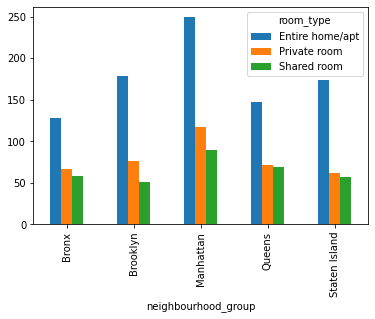

In [16]:
# graph of mean price of property according to the location
plt.figure(figsize=(12,10))
mean_preferred_price_df.plot.bar()

# **2- Where most of the host focused to own property.**

In [17]:
#using groupby operation on neaighbourhood_group to find the number of host according to the location
num_of_host_per_location= airbnb_df.groupby(['neighbourhood_group'],as_index= False)['host_id'].count().sort_values(['host_id'], ascending= False)
num_of_host_per_location

,neighbourhood_group,host_id
2,Manhattan,21643
1,Brooklyn,20089
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


In [18]:
# renaming the columns of the df
num_of_host_per_location= num_of_host_per_location.rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
num_of_host_per_location

,Location,Host
2,Manhattan,21643
1,Brooklyn,20089
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


# **Answer:- Manhattan is the most focused place for host**

In [19]:
# take a simple formate of above question without index for plot the line chart
host_per_location= airbnb_df.groupby(['neighbourhood_group'])['host_id'].count()
host_per_location

neighbourhood_group
Bronx             1089
Brooklyn         20089
Manhattan        21643
Queens            5664
Staten Island      373
Name: host_id, dtype: int64

Text(0, 0.5, 'Host')

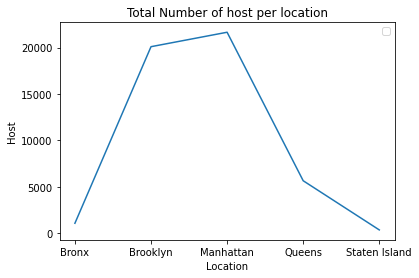

In [20]:
# now plotting the k=line graph
plt.legend(labels=['Number of host'])
plt.plot(host_per_location)
plt.title('Total Number of host per location')
plt.xlabel('Location')
plt.ylabel('Host')

In [21]:
# info about numerical columns in dataset
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


# **Points to be noted:-**

1- Here we can see that there is a minimum proce of $0. We have to fix it because Airbnb is not provide free stay in hotel.


Solution:- For that we have to check where the price is $0. And we have to create one functionin which as per minimum nights the price wiil be set as per formulae.

2- There are sum entries in dataset where minimum night is 1 but it's respective price is $0.

Solution:- We replace the price value with the mean value of price where amount is less than $100.[ Refers below cell for more details]

In [22]:
# now identifying the few observation where minimum night is 1 and the price is minimum
airbnb_df[airbnb_df['minimum_nights']==1].sort_values(['price','minimum_nights'],ascending=[True,True])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,222
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,Shared room,10,1,0,1,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,Entire home/apt,10,1,43,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,Entire home/apt,6800,1,0,6,364
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,Entire home/apt,7500,1,0,1,364
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,Private room,7500,1,8,2,179
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,Entire home/apt,7703,1,0,12,146


In [23]:
# getting the value where price is less than $100
airbnb_df.loc[airbnb_df['price']<100,'price'].count()

21861

In [24]:
# making a copy of original dataframe to peform additional operation
airbnb_price_df= airbnb_df.copy()

In [25]:
# finding the mean value of price where price is less than $100
round(airbnb_df.loc[airbnb_df['price']<100,'price'].mean())

65

In [26]:
#change the value of price where minimun night is 1 and price of property is less than 50
airbnb_price_df['price']=np.where((airbnb_price_df['price']<=50)& (airbnb_price_df['minimum_nights']==1), round(airbnb_df.loc[airbnb_df['price']<100 , 'price'].mean()),airbnb_price_df['price'])

In [27]:
#still 8 rows have amount =0$
airbnb_price_df[airbnb_price_df['price']==0].count()

id                                8
name                              8
host_id                           8
host_name                         8
neighbourhood_group               8
neighbourhood                     8
room_type                         8
price                             8
minimum_nights                    8
number_of_reviews                 8
calculated_host_listings_count    8
availability_365                  8
dtype: int64

In [28]:
#finding the observation where price is still 0$
airbnb_price_df[airbnb_price_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,5,3,1,73
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0,3,0,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,2,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,5,6,139


In [30]:
#using function that gives us new price according to minimum nights
def price_calculator(min_night):
  ''' Get the price based on the minimum night you are given'''
  mean_price= round(airbnb_df.loc[airbnb_df['price']<100,'price'].mean())
  new_price= mean_price*min_night
  return new_price

In [31]:
# Replace the value of price according to the minimum night where price =0$
airbnb_price_df['price']= np.where((airbnb_price_df['price']==0),price_calculator(airbnb_price_df['minimum_nights']),airbnb_price_df['price'])

In [32]:
# New statical descriotion of our dataset
airbnb_price_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,153.846801,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.078850,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,10.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


# **3- Finding top 15 host with most listing**

In [33]:
# Total number of host id
airbnb_df['host_id'].count()

48858

In [34]:
#creating new dataframe
host_id_count= list(airbnb_df['host_id'].value_counts())
host_id= list(airbnb_df.host_id)
listing_count=list(zip(host_id,host_id_count))
count_host_id_df=pd.DataFrame(listing_count)

In [37]:
#now renaming some colunms
count_host_id_df.rename(columns={0:'Host_id',1:'Counts'}, inplace=True)

In [38]:
#now storing top 15 host with most listing
top_15_host_id= count_host_id_df.head(15)
top_15_host_id

,Host_id,Counts
0,2787,327
1,2845,232
2,4632,121
3,4869,103
4,7192,96
5,7322,96
6,7356,91
7,8967,87
8,7490,65
9,7549,52


[Text(0, 0, '2787'),
 Text(0, 0, '2845'),
 Text(0, 0, '4632'),
 Text(0, 0, '4869'),
 Text(0, 0, '7192'),
 Text(0, 0, '7322'),
 Text(0, 0, '7356'),
 Text(0, 0, '8967'),
 Text(0, 0, '7490'),
 Text(0, 0, '7549'),
 Text(0, 0, '7702'),
 Text(0, 0, '7989'),
 Text(0, 0, '9744'),
 Text(0, 0, '11528'),
 Text(0, 0, '11975')]

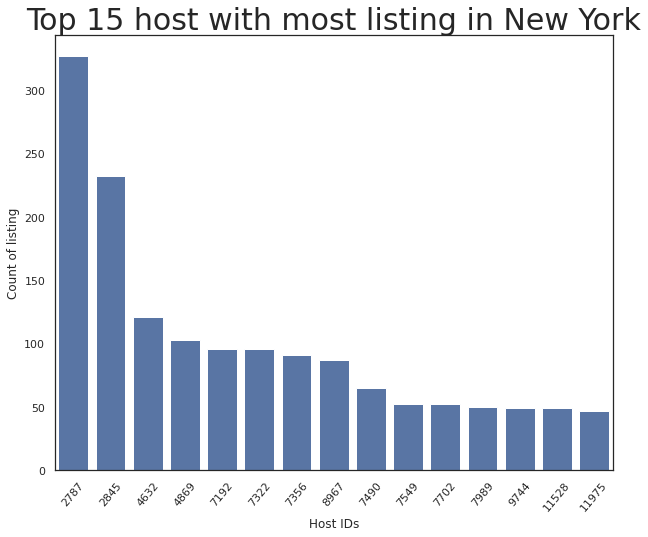

In [40]:
#now plottinfg the graph
sns.set(rc={'figure.figsize':(10,8)})

#Setting background color of chart as white
sns.set_style('white')

#plotting the chart
viz_bar=sns.barplot(x='Host_id', y='Counts', color='b', data= top_15_host_id, order= top_15_host_id.sort_values('Counts', ascending=False).Host_id)

#setting font size for title
sns.set(font_scale = 2.5)

#name of the chart
viz_bar.set_title('Top 15 host with most listing in New York')

#naming X and Y axis
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listing')

#adjusting the bar lables
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=50)